<h1>Batch Normalization on deep neural networks </h1>



<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Networks, Criterion function, Optimizer.</h5>
<h5> 2. Train Neural Network using Batch Normalization and no Batch Normalization </h5>   



<h2>Table of Contents</h2>
Here, a Neural Network will be built using Batch Normalization and compared to a Neural Network that does not use Batch Normalization. We will use the MNIST dataset to test the network. 

<ul>
<li><a href="#Train_Func">Neural Network Module and Training Function</a></li>
<li><a href="#Makeup_Data">Load Data </a></li>
<li><a href="#NN">Define Several Neural Networks, Criterion function, Optimizer</a></li>
<li><a href="#Train">Train Neural Network using Batch Normalization and no Batch Normalization</a></li>
<li><a href="#Result">Analyze Results</a></li>
</ul>

We have the outputs for each of the neurons and what we're going to do, is **calculate the mean and standard deviation or variance** for a particular **mini-batch.** We're going to n**ormalize the output, then we're going to scale and shift them, and these are actually parameters, which we're going to learn via training. It'll take these outputs and pass them to the activation function.**

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm01.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="800," align="center" alt="Batch-normalization01">

So we have our first mini-batch, which we'll denote by the matrix or Tensor X1, and then we'll have the output for the activations, which will start in the following tensor or matrix Z. So we'll have the output for the first neuron, second neuron and third neuron. The first sample will correspond to the first row of the matrix of Tensor Z and we'll use the same convention for each of the samples. We'll just use the index m to represent the actual sample. 

**So what we're going to do, is calculate the mean and standard deviation for all the samples for each neuron, and then we'll normalize the output for each neuron. Normalization will be don by subtracting the mean and dividing it by the standard deviation.** In this is one will add a small little value epsilon, in case the standard deviation is zero. Epsilon=0.0001.

Then we'll apply the **Scaling ship parameters** to each of the neurons and again these parameters are learned via training and this gives a model some flexibility.

Then will repeat the process for the second layer. We'll calculate the mean and standard deviation, we'll normalize the values, apply a second scale and shift parameter, and then we'll pass the activation functions. 

Then we repeat the process for the next batch. So we did for X1, so now we'll have the second batch, we'll denote by the matrix or Tensor X2. We'll calculate a new mean and standard deviation and normalize it accordingly,and repeat the whole process again. And we'll do for the second layer as well. 

**For prediction, we use the population mean and population standard deviation.**

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm02.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="700," align="center" alt="Batch-normalization02">

The procedure is pretty similar. We take our actual activation functions and we apply the same procedure. And as you can see, the mean and variance in this case, don't have the little batch term.

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm03.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="800," align="center" alt="Batch-normalization03">

We do for the second layer pretty much the same process and of course the parameters for scaling and shift are obtained via training. 

**Let's discuss why batch normalization works.** 

So here we have an equation, and we have Z1 and Z2. In the left example (with batch normalization), the results are constrained from one whereas and in the right example (without batch normalization), variable z is constrained from 0.1-10. 

So if you look at the possible values for the left equation, you can see that our parameters take on relatively equal values.
If you look at the right equation, we can see the parameters have all different values they can take. 

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm04.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="500," align="center" alt="Batch-normalization04">

So this expresses itself in the contours of loss function. 

We use batch normalization (left). In this case, we can see the contours are relatively round, so we perform gradient descent. The steps are in the relatively same direction and it converges. 

In the other case (right), we wouldn't use batch normalization, and we'll perform gradient descent. The gradients are pointing in different directions. So it will take us longer to converge them there.

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm05.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="500," align="center" alt="Batch-normalization05">

**We also have the vanishing gradient problem**. Please, see the code and html document *"NeuralNetworks-InitializationWeights-Pytorch"* for an explanation.

Let's say we have this sigmoid function: 

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm06.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="500," align="center" alt="Batch-normalization06">

In case of having non-normalized inputs, their derivative values will be close to zero. 

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm07.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="500," align="center" alt="Batch-normalization07">

On the other hand, normalized data would create larger values: 

<img src="https://jupyterlab-0-labs-prod-jupyterlab-us-east-0.labs.cognitiveclass.ai/user/mathildeduvi/files/labs/batch-norm08.png?_xsrf=MnwxOjB8MTA6MTcxNzQzNTEwOHw1Ol94c3JmfDEzMjpZbVJsTkdJM01HWTRORGsxTkRabE9EbGtOVGxpT0RZM04ySm1aVGMzTURnNk4ySmtNV1V4TW1Ga09XTXlabVF4WkRjeVl6azJNalprWlRNd1kyVTFZVEExWWpFNVpHRTBOelpsTVRaaU1qRTVObVprTVRVMlltTmtNalJrWlRaa1pnPT18ZjI0MWI2YTA1MWI3Y2RhNzg3ZjBmMjcwZjUxYTBjYWUxN2EwMWJjODU0NDc0Yjk1ZDU2ZWRiMjg4ODZiYmE0Ng" width="500," align="center" alt="Batch-normalization08">

Overall, batch normalization's general advantages are: 

- **Dropout is not necessary**
- **The learning rate can be increased**

<h2>Preparation</h2>


In [1]:
# Libraries

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

<h2 id="Train_Func">Neural Network Module and Training Function</h2> 


Define the neural network module or class 


 Neural Network Module with two hidden layers using Batch Normalization


In [2]:
# Define the Neural Network Model using Batch Normalization

class NetBatchNorm(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results 
    def activation(self, x):
        out = []
        z1 = self.bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

Neural Network Module with two hidden layers with out Batch Normalization


In [3]:
# Class Net for Neural Network Model

class Net(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):

        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results 
    def activation(self, x):
        out = []
        z1 = self.linear1(x)
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.linear2(a1)
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out 


Define a function to train the model. In this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [4]:
# Define the function to train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [5]:
# load the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the validating dataset by setting the parameters train  <code>False</code> and convert it to a tensor by placing a transform object into the argument <code>transform</code>


In [6]:
# load the train dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

create the training-data loader and the validation-data loader object 


In [7]:
# Create Data Loader for both train and validating

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<a id="ref3"></a>
<h2>Define Neural Network, Criterion function, Optimizer and Train the  Model  </h2> 


Create the criterion function  


In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Variables for Neural Network Shape <code> hidden_dim</code> used for number of neurons in both hidden layers.


In [9]:
# Set the parameters

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

<h2 id="Train">Train Neural Network using Batch Normalization and no Batch Normalization </h2> 


Train Neural Network using  Batch Normalization :


In [10]:
# Create model, optimizer and train the model

model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm=train(model_norm , criterion, train_loader, validation_loader, optimizer, epochs=5)

Train Neural Network with no Batch Normalization:


In [11]:
# Create model without Batch Normalization, optimizer and train the model

model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=5)

<h2 id="Result">Analyze Results</h2> 


model.eval() sets the PyTorch model to evaluation mode, disabling operations like dropout or batch normalization.

Batch normalization layers adapt their behavior based on whether the model is in training or evaluation mode.

In evaluation mode, batch normalization layers employ population statistics rather than batch statistics, offering a stable normalization process during inference.

In [12]:
model.eval()

Net(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)

In [13]:
model_norm.eval()

NetBatchNorm(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Compare the histograms of the activation for the first layer of the first sample, for both models.


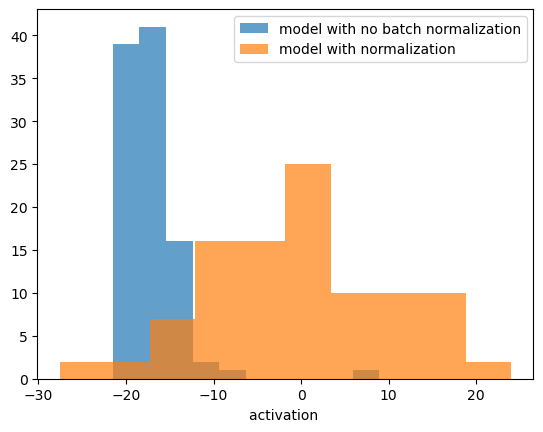

In [14]:
out=model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[2],label='model with no batch normalization', alpha=0.7)
out_norm=model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[2],label='model with normalization', alpha=0.7)
plt.xlabel("activation ")
plt.legend()
plt.show()

We see the activations with Batch Normalization are zero centred and have a smaller variance.


Compare the training loss for each iteration


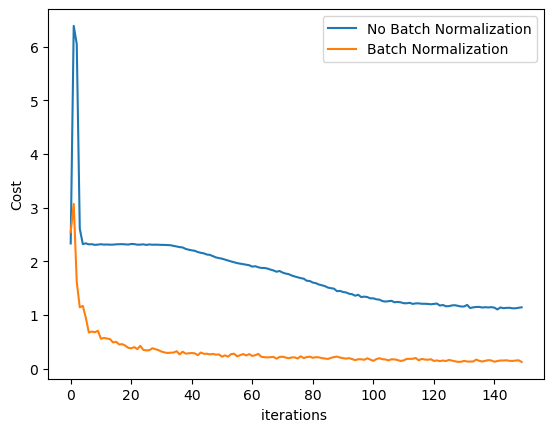

In [15]:
# Plot the diagram to show the loss
plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')   
plt.legend()
plt.show()

Compare the validating accuracy for each iteration


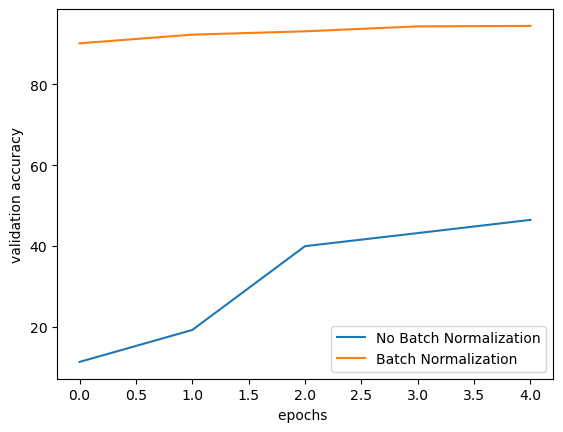

In [16]:
# Plot the diagram to show the accuracy
plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

-------------------------------------------------------------------------------------------------------------------------------------------

Author: <a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 

<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>
-->

## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
